# Tasks

For this assignment, we will be working with the US Health [Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data Loading

In [2]:
filename = 'https://raw.githubusercontent.com/jaytrey777/Hypothesis-Testing-with-Insurance-Data/main/Data/insurance%20data.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?

## Hypothesis

__H<sub>0</sub> - Null Hypothesis:__ 
There __IS NOT__ a significant difference between the insurance rates of smokers and non-smokers.

__H<sub>1</sub> - Alternate Hypothesis:__ 
There __IS__ a significant difference between the insurance rates of smokers and non-smokers.

__Alpha__ = 0.05 

## Smokers Data

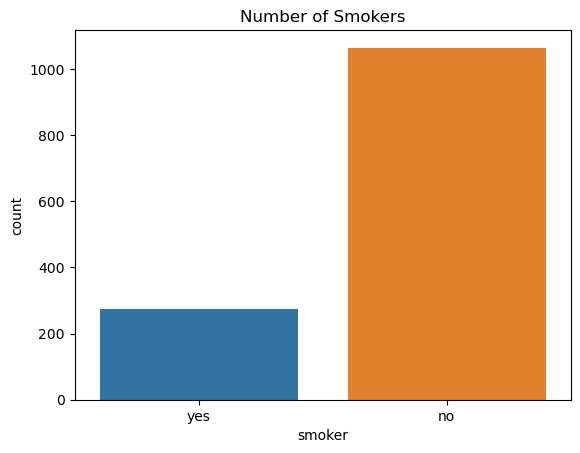

In [3]:
ax = sns.countplot(data = df, x = 'smoker')
ax.set_title('Number of Smokers');

## Test Selection

Data Type: 
- Numeric

Samples/groups: 
- 2 (smokers and nonsmokers)

Based on the table below, we should do a `2 Sample T-Test`

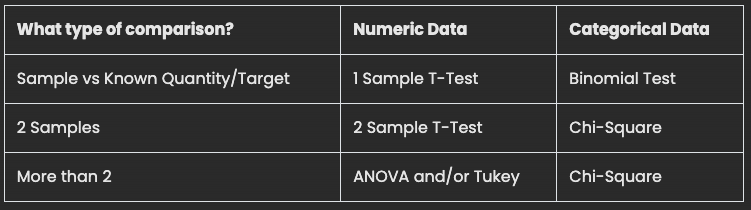

## 2 Sample T-Test Assumptions

- No Significant Outliers
- Normality
- Equal Variance

## Check for and Remove Outliers

In [4]:
# split into groups
yes_group = df.loc[df['smoker']=="yes", 'charges']
no_group = df.loc[df['smoker']=="no", 'charges']

print(f'There are {len(yes_group)} smokers and {len(no_group)} non-smokers.')
display(yes_group.head(), no_group.head())

There are 274 smokers and 1064 non-smokers.


0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [5]:
# smokers outliers
yes_zscores = stats.zscore(yes_group)
yes_outliers = abs(yes_zscores) > 3

# non-smokers outliers
no_zscores = stats.zscore(no_group)
no_outliers = abs(no_zscores) > 3

print(f'There are {np.sum(yes_outliers)} outliers for the smokers.')
print(f'There are {np.sum(no_outliers)} outliers for the non-smokers.')

There are 0 outliers for the smokers.
There are 24 outliers for the non-smokers.


In [6]:
# show outliers for non-smokers
outliers = no_group[(np.abs(stats.zscore(no_group)) > 3)]
outliers.sort_values()

964     26467.09737
379     27000.98473
1142    27117.99378
138     27322.73386
539     27346.04207
140     27375.90478
516     27724.28875
770     27941.28758
443     28287.89766
987     28340.18885
959     28468.91901
806     28476.73499
9       28923.13692
696     29186.48236
1258    30063.58055
62      30166.61817
115     30259.99556
387     30284.64294
573     31620.00106
936     32108.66282
599     33471.97189
242     35160.13457
1012    36580.28216
1206    36910.60803
Name: charges, dtype: float64

In [7]:
print(f'Before the outliers are removed, there are {len(no_group)} non-smokers')

no_group = no_group[(np.abs(stats.zscore(no_group)) <= 3)]

print(f'After the outliers are removed, there are {len(no_group)} non-smokers')

Before the outliers are removed, there are 1064 non-smokers
After the outliers are removed, there are 1040 non-smokers


## Normality Testing

In [8]:
# smokers
result_smokers = stats.normaltest(yes_group)

# nonsmokers
result_nonsmokers = stats.normaltest(no_group)

print(f'Smokers: {result_smokers}')
print(f'Non-Smokers:{result_nonsmokers}')

Smokers: NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
Non-Smokers:NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


The normality tests have __p-values less than 0.05__ for both the smoker and the non-smokers. This means our data __IS NOT__ normally distributed. 

Since we __DO NOT__ have normally distributed data, the next section can be skipped if there are more than 15 samples in each group. We have 274 smokers and 1064 non-smokers in our data.

## Equal Variance Testing

In [9]:
ev_result = stats.levene(yes_group, no_group)
ev_result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The equal variance test has a p-value that is below our alpha value of 0.05. This means our data __DOES NOT__ have equal variance

We can consider the two groups to have __UNEQUAL/DIFFERENT__ variances.

## Independent (2-sample) T-Test with `equal_var = False`

In [10]:
ttest_result = stats.ttest_ind(yes_group, no_group, equal_var = False)
ttest_result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

## T-Test Results

The p-value for our T-Test is below our alpha value of 0.05, which allows us to __REJECT the null hypothesis__ that there is no significant difference between the charges of smokers and non-smokers.

This means that we will consider smokers and nonsmokers to have __UNEQUAL__ insurance charges and we can __SUPPORT the alternative hypothesis__ that there *__is significant__* difference between the charges of smokers and non-smokers.

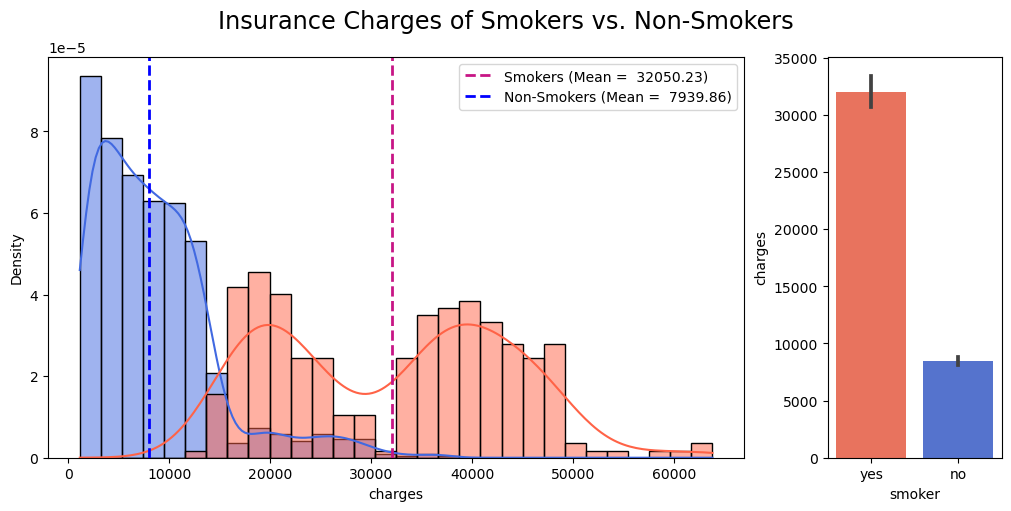

In [11]:
# specify colors
colors = {'yes': 'tomato', "no": 'royalblue', 
          'yes_avg' : 'mediumvioletred', 'no_avg' : 'blue'}

# visualize means
fig, (ax, ax_bar) = plt.subplots(figsize = (10, 5), ncols = 2, 
                                 constrained_layout = True,
                                 gridspec_kw = {'width_ratios': [0.8, 0.2]})

# histogram
ax = sns.histplot(data = df, x = 'charges', fill = True, hue = 'smoker', 
                  kde = True, stat = 'density', common_norm = False, ax = ax, 
                  palette = colors)

ax.axvline(np.mean(yes_group), ls = '--', lw = 2, 
           label = f"Smokers (Mean = {np.mean(yes_group): .2f})",
           color = colors['yes_avg'])

ax.axvline(np.mean(no_group), ls = '--', lw = 2, 
           label = f"Non-Smokers (Mean = {np.mean(no_group): .2f})",
           color = colors['no_avg'])

ax.legend(prop = {"size": 10}, loc = 'best')

# barplot
sns.barplot(data = df, x = 'smoker', y = 'charges', ax = ax_bar, palette = colors)

fig.suptitle('Insurance Charges of Smokers vs. Non-Smokers', fontsize = 'xx-large');

# Q2. Are men more likely to smoke than women?

## Hypothesis

__H<sub>0</sub> - Null Hypothesis:__ 
Men __ARE NOT__ more likely to smoke than women.

__H<sub>1</sub> - Alternate Hypothesis:__ 
Men __ARE__ more likely to smoke than women.

__Alpha__ = 0.05

## Gender Data

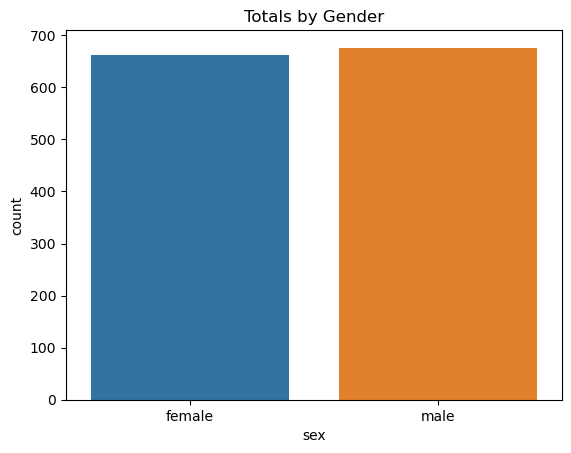

In [12]:
ax = sns.countplot(data = df, x = 'sex')
ax.set_title("Totals by Gender");

## Test Selection

Data Type: 
- Categorical

Samples/groups: 
- 2 (Men and Women)

Based on the table below, we should do a `Chi Squared Test`

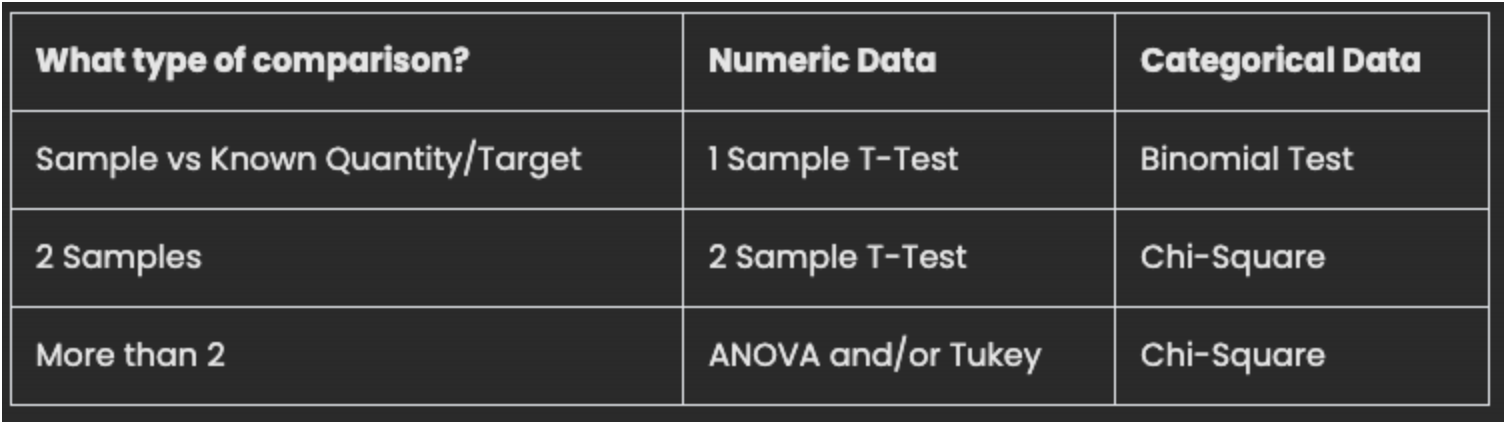

## Chi-Squared Test Assumptions

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent.

## Chi-Squared Test

In [13]:
# Contingency Table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

## Chi Squared Test Results

In [15]:
# Print p-value and verify if its less than alpha
print(f'p-value: {p}')
p < .05

p-value: 0.006548143503580696


True

The p-value from the Chi-Squared Test is less than alpha value of 0.05, which allows us to __REJECT the null hypothesis__ that Men are not more likely to smoke than Women.

This means that we will consider men and women to have __UNEQUAL__ likeliness to smoke. This means we __SUPPORT the alternative hypothesis__ that Men __ARE__ more likely to smoke than Women.

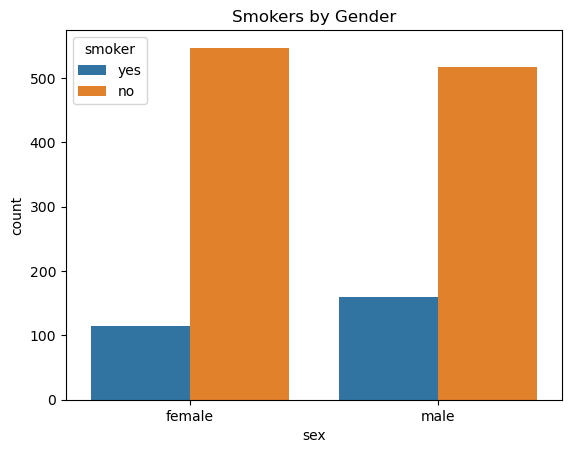

In [16]:
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title("Smokers by Gender");

# Q3. Do different regions have different charges, on average?

## Hypothesis

__H<sub>0</sub> - Null Hypothesis:__ 
There __IS NOT__ a significant difference between the insurance rates of different regions.

__H<sub>1</sub> - Alternate Hypothesis:__ 
There __IS__ a significant difference between the insurance rates of different regions.

__Alpha__ = 0.05 

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Regional Data

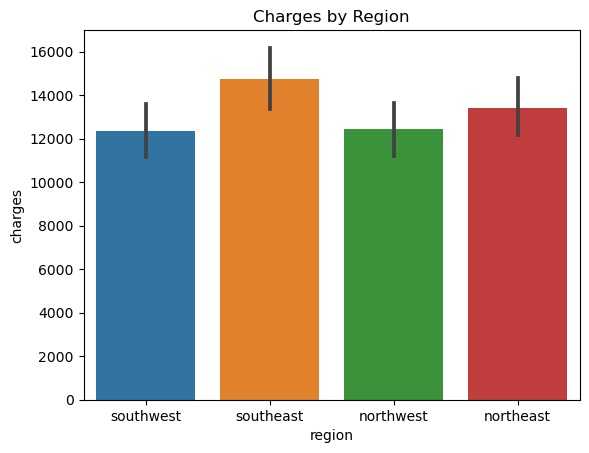

In [18]:
ax = sns.barplot(data = df, x = 'region', y = 'charges')
ax.set_title("Charges by Region");

## Test Selection

Data Type: 
- Categorical

Samples/groups: 
- 4 (SouthWest, SouthEast, NorthWest and NorthEast)

Based on the table below, we should do a `ANOVA and/or Tukey Test`
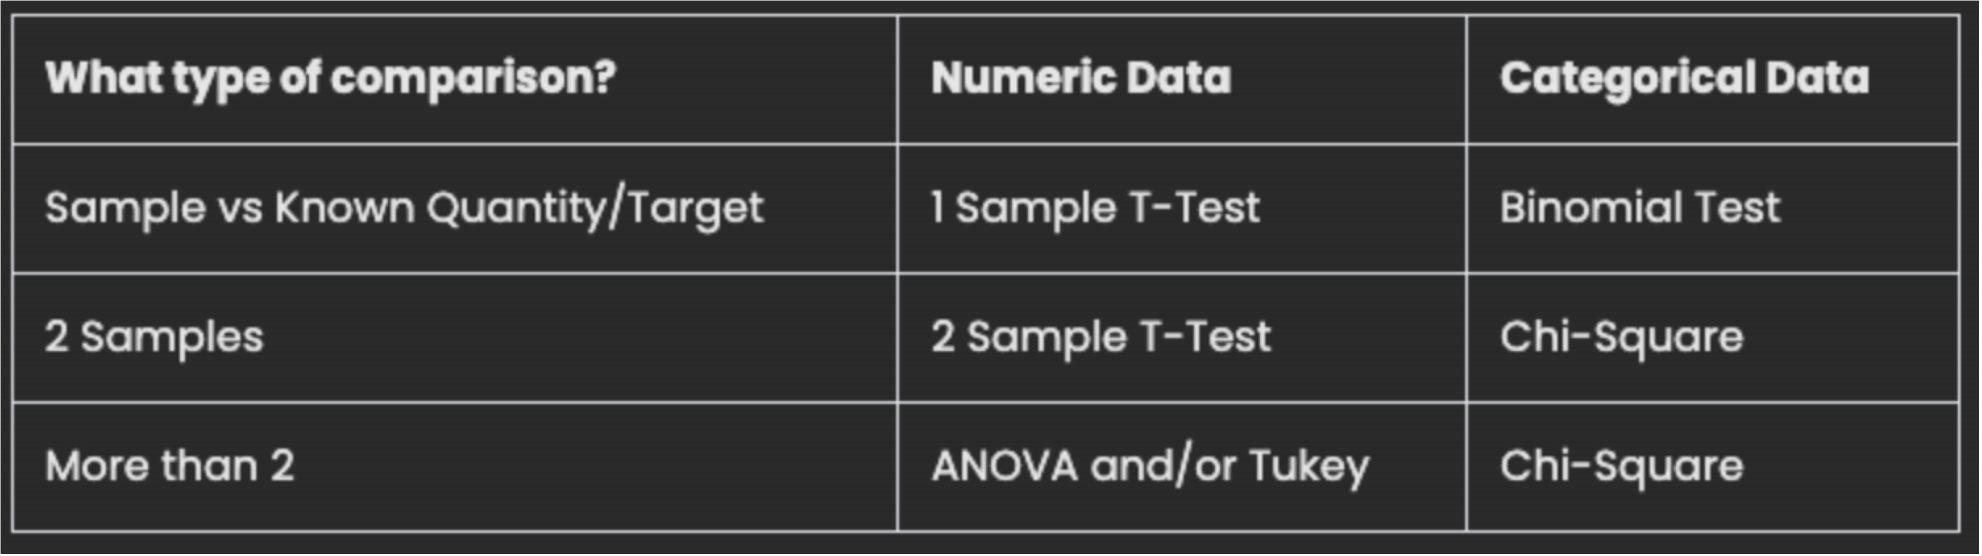

## ANOVA Test Assumptions

- No significant outliers
- Equal variance
- Normality

## Separate Groups

In [19]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
print(groups.keys())
groups

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])


{'southwest': 0       16884.92400
 12       1826.84300
 15       1837.23700
 18      10602.38500
 19      36837.46700
            ...     
 1316     1731.67700
 1329    10325.20600
 1331    10795.93733
 1332    11411.68500
 1336     2007.94500
 Name: charges, Length: 325, dtype: float64,
 'southeast': 1        1725.5523
 2        4449.4620
 5        3756.6216
 6        8240.5896
 11      27808.7251
            ...    
 1322    12981.3457
 1323    43896.3763
 1327     9377.9047
 1330    12629.1656
 1335     1629.8335
 Name: charges, Length: 364, dtype: float64,
 'northwest': 3       21984.47061
 4        3866.85520
 7        7281.50560
 9       28923.13692
 24       6203.90175
            ...     
 1319     7201.70085
 1320     5425.02335
 1324     4239.89265
 1333    10600.54830
 1337    29141.36030
 Name: charges, Length: 325, dtype: float64,
 'northeast': 8        6406.41070
 10       2721.32080
 16      10797.33620
 17       2395.17155
 20      13228.84695
            ...     
 1321

## Check for and Remove Outliers

In [20]:
# iterate through groups
for region, charges in groups.items():
    zscores = stats.zscore(charges)
    outliers = abs(zscores) > 3
    print(f"Outliers for {region} region: {np.sum(outliers)}")

    print(f'Before the outliers are removed, there are {len(groups[region])} samples in the {region} region')
    groups[region] = charges[(np.abs(stats.zscore(charges)) <= 3)]
    print(f'After the {np.sum(outliers)} outliers are removed, there are {len(groups[region])} samples in the {region} region')
    print()


Outliers for southwest region: 8
Before the outliers are removed, there are 325 samples in the southwest region
After the 8 outliers are removed, there are 317 samples in the southwest region

Outliers for southeast region: 2
Before the outliers are removed, there are 364 samples in the southeast region
After the 2 outliers are removed, there are 362 samples in the southeast region

Outliers for northwest region: 7
Before the outliers are removed, there are 325 samples in the northwest region
After the 7 outliers are removed, there are 318 samples in the northwest region

Outliers for northeast region: 4
Before the outliers are removed, there are 324 samples in the northeast region
After the 4 outliers are removed, there are 320 samples in the northeast region



## Normality Testing

In [21]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [22]:
### checking char with pandas 
norm_results_df['significance'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significance
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


The normality tests shows that all the regions have __p-values less than 0.05__. This means our data __IS NOT__ normally distributed. 

Since the charges __ARE NOT__ normally distributed and we have __more than__ 15 samples in each region, the data is large enough to continue with the `ANOVA Test`.

## Equal Variance Testing

In [23]:
# EV Test with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [24]:
# EV Test entering each group manually
stats.levene(groups['southwest'], groups['southeast'],
            groups['northwest'],
            groups['northeast'])

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

The equal variance test has a p-value that is below our alpha value of 0.05. This means our data DOES NOT have equal variance

We can consider the two groups to have UNEQUAL/DIFFERENT variances.

Since our categories have unequal variances, we cannot perform the ANOVA Test but we can use the Kruskal-Wallis Test. We have non-parametric data so the Kruskal-Wallis works better due to the fact that it is not dependent on normal distribution.

In [25]:
norm_results_df['n']

southwest    317.0
southeast    362.0
northwest    318.0
northeast    320.0
Name: n, dtype: float64

## Kruskal-Wallis Test

In [26]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

## Kruskal-Wallis Test Results

The p-value from the Kruskal-Wallis Test is greater than alpha value of 0.05, which allows us to __SUPPORT the null hypothesis__ that there __NOT__ a significant difference between the insurance rates of different regions.

This means that we will consider different regions to have __EQUAL/SIMILAR__ insurance rates. This means we __REJECT the alternative hypothesis__ that there is a significant difference between the insurance rates of different regions.


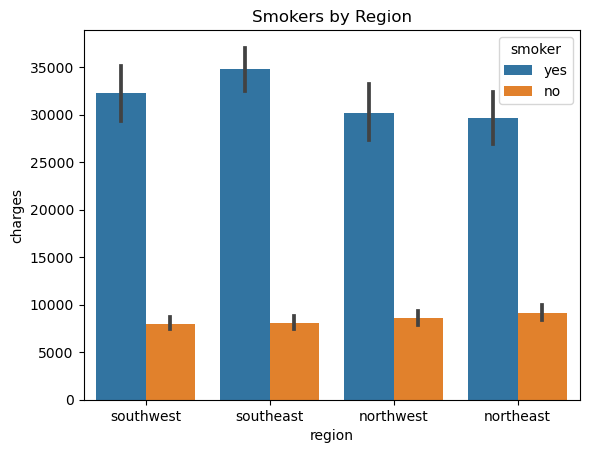

In [27]:
ax = sns.barplot(data = df, x = 'region', y = 'charges', hue = 'smoker')
ax.set_title("Smokers by Region");